# Unnormalized log transformed: breast, prostate, thyroid

The unnormalized and log transformed breast, prostate and thyroid

In [1]:
from train_RNA_ResNet import ResNet
from keras import callbacks as cb
from Calibration_Util import FileIO as io
import os
import numpy as np

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/ubuntu/anaconda3/envs/t

In [2]:
rnaNet = ResNet()

# GTEX as source and TCGA as target
source_file = 'unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
target_file = 'unnorm-log-20PC-TCGA-breast-prostate-thyroid.csv'
source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + source_file)
target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + target_file)

# Make GTEX target and TCGA source
# target_file = 'unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
# source_file = 'unnorm-log-20PC-TCGA-breast-prostate-thyroid.csv'
# source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/' + source_file)
# target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/' + target_file)


rnaNet.load_data(source_path=source_path,
                target_path=target_path)

In [3]:
print("\ngtex = source shape = " + str(rnaNet.source.shape))
print("tcga = target shape = " + str(rnaNet.target.shape))


gtex = source shape = (636, 20)
tcga = target shape = (211, 20)


In [4]:
import CostFunctions as cf
from keras import backend as K
from scipy.spatial.distance import cdist

source = rnaNet.source
target = rnaNet.target
print(target.shape)

(211, 20)


In [5]:
mmd = cf.MMD(source, target, MMDTargetSampleSize=target.shape[0], n_neighbors=10)
print(source.dtype)
print(target.dtype)
print(K.eval(mmd.scales).dtype)
print(K.eval(mmd.cost(source.astype('float32'), target.astype('float32'))))

setting scales using KNN
[20.450462726168521, 40.900925452337042, 81.801850904674083]
setting all scale weights to 1
float64
float64
float32
0.950534


In [6]:
mmd = cf.MMD(source, target, MMDTargetSampleSize=target.shape[0], n_neighbors=10)
scales = K.eval(mmd.scales)

n = source.shape[0]
m = target.shape[0]
weights = np.asarray([1/n**2, 1/(n*m), 1/m*2])

setting scales using KNN
[20.452489713579666, 40.904979427159333, 81.809958854318666]
setting all scale weights to 1


In [11]:
rnaNet.init_res_net()

setting scales using KNN
[24.548873058759206, 49.097746117518412, 98.195492235036824]
setting all scale weights to 1


In [12]:
callbacks=[rnaNet.lrate, cb.EarlyStopping(monitor='val_loss', patience=100, mode='auto')]
rnaNet.train(epochs=1, callbacks=callbacks)

Train on 572 samples, validate on 64 samples
Epoch 1/1
572/572 [==============================] - 1s 1ms/step - loss: 1.2678 - val_loss: 1.7224


In [13]:
from plots import scatter_plot, heatmap
rnaNet.pca()
%matplotlib inline

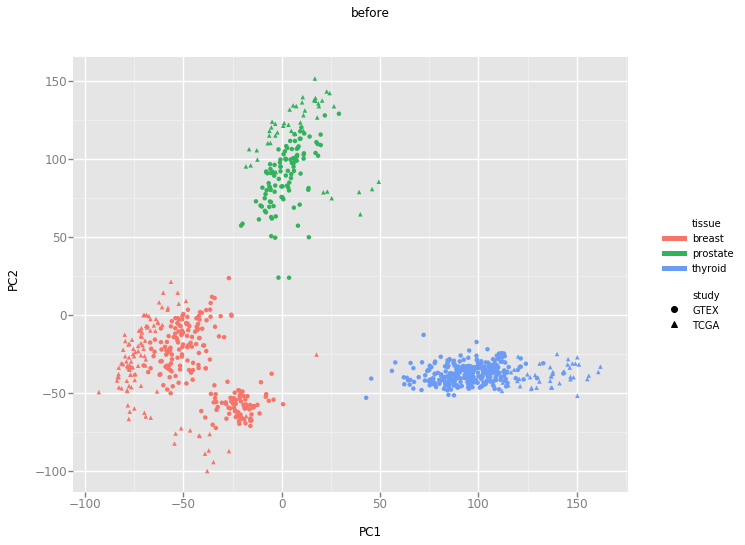

<ggplot: (-9223363300197026016)>


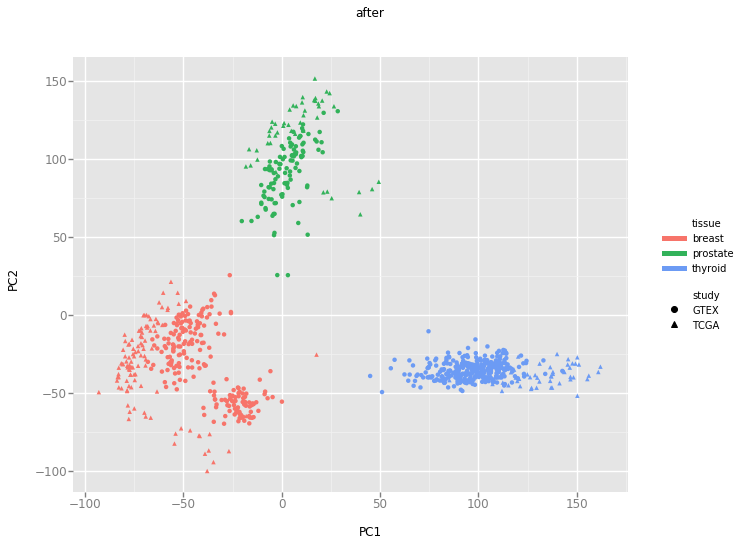

<ggplot: (8736655927279)>


In [14]:
scatter_plot(rnaNet.source_pca_df, rnaNet.target_pca_df, title="before")
scatter_plot(rnaNet.calibrated_source_pca_df, rnaNet.target_pca_df, title="after")

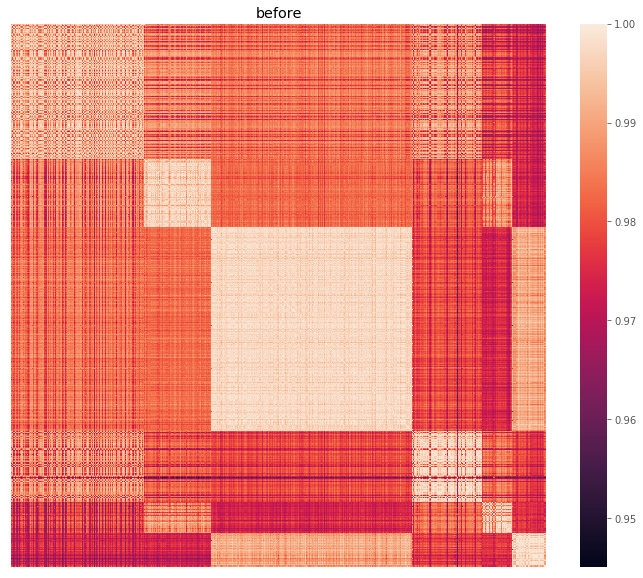

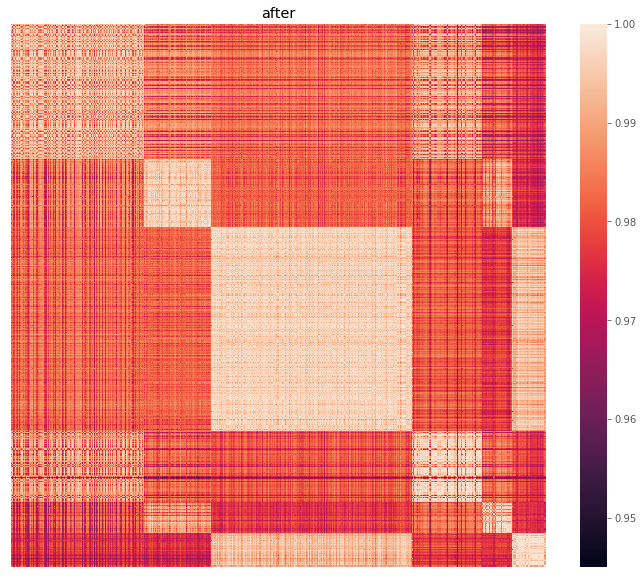

In [15]:
heatmap(rnaNet.source_df, rnaNet.target_df, title="before")
heatmap(rnaNet.calibrated_source_df, rnaNet.target_df, title="after")

In [ ]:
save_file = 'calibrated-unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
save_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + save_file)

In [ ]:
rnaNet.save_calibrated(path=save_path)